In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_train = pd.read_csv('/home/somit/Kaggle/Titanic/train.csv')
data_test = pd.read_csv('/home/somit/Kaggle/Titanic/test.csv')
#data_train.sample(2)
data_test.sample(2)
#data_train.describe()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
189,1081,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0,NaN,S
248,1140,2,"Hold, Mrs. Stephen (Annie Margaret Hill)",female,29.0,1,0,26707,26.0,NaN,S


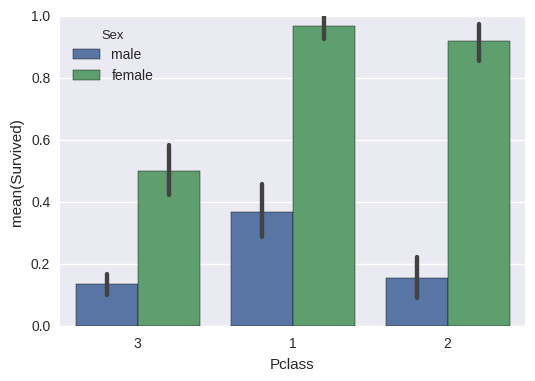

In [44]:
sns.barplot(x="Pclass",y="Survived",hue="Sex",data=data_train)

In [45]:
def simplify_ages(df):
    df.Age.fillna(0)
    bins=[0,5,14,20,35,60,90]
    group_names=['Baby','Teenager','Student','YoungAdult','Adult','Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age=categories
    return df

def drop_features(df):
    df=df.drop(['Ticket','Name','Cabin','Fare'],axis=1)
    return df

def transform_features(df):
    df=simplify_ages(df)
    df=drop_features(df)
    return df

data_train=transform_features(data_train)
data_test=transform_features(data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,YoungAdult,1,0,S
1,2,1,1,female,Adult,1,0,C
2,3,1,3,female,YoungAdult,0,0,S
3,4,1,1,female,YoungAdult,1,0,S
4,5,0,3,male,YoungAdult,0,0,S


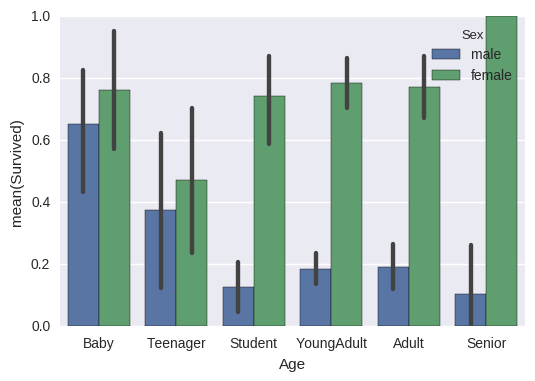

In [46]:
sns.barplot(x="Age",y="Survived",hue="Sex",data=data_train)

In [47]:
from sklearn import preprocessing

def encode_features(df_train,df_test):
    features=['Age','Sex','Embarked']
    #df=pd.concat([df_train[features],df_test[features]])
    for feature in features:
        le=preprocessing.LabelEncoder()
        df_train[feature] = le.fit_transform(df_train[feature])
        df_test[feature] = le.fit_transform(df_test[feature])
    return df_train, df_test

data_train,data_test=encode_features(data_train,data_test)
data_train.head()
#data_test.head()
        

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,182,1,0,4
1,2,1,1,0,177,1,0,2
2,3,1,3,0,182,0,0,4
3,4,1,1,0,182,1,0,4
4,5,0,3,1,182,0,0,4


In [48]:
from sklearn.cross_validation import train_test_split

label=data_train['Survived']
features=data_train.drop(['PassengerId','Survived'],axis=1)
print features[:5]

X_train,X_test,Y_train,Y_test=train_test_split(features,label,test_size=0.20,random_state=47)


   Pclass  Sex  Age  SibSp  Parch  Embarked
0       3    1  182      1      0         4
1       1    0  177      1      0         2
2       3    0  182      0      0         4
3       1    0  182      1      0         4
4       3    1  182      0      0         4


In [86]:
# from sklearn.preprocessing import StandardScaler
# # Define the scaler
# scaler = StandardScaler().fit(X_train)
# # Scale the train set
# X_train = scaler.transform(X_train)
# X_test=scaler.fit_transform(X_test)
# print X_train[:5]
# print X_test[:5]

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer,accuracy_score
import xgboost
from xgboost import XGBClassifier

#clf=RandomForestClassifier()
clf=XGBClassifier()
#clf=svm.SVC(C=10,kernel='rbf',gamma=1)

'''parameters={'n_estimators':[4,6,9],'max_features':['log2', 'sqrt','auto'], 
            'criterion': ['entropy', 'gini'],
            'max_depth': [2, 3, 5, 10], 
            'min_samples_split': [2, 3, 5],
            'min_samples_leaf': [1,5,8]
            }
acc_scorer=make_scorer(accuracy_score)
grid_obj=GridSearchCV(clf,parameters,scoring=acc_scorer)
grid_obj=grid_obj.fit(X_train,Y_train)
clf = grid_obj.best_estimator_
'''
# Fit the best algorithm to the data. 
clf.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [88]:
predictions=clf.predict(X_test)
print(accuracy_score(Y_test,predictions))

0.784753363229


In [89]:
from sklearn.cross_validation import KFold

def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = features.values[train_index],features.values[test_index]
        Y_train, Y_test = label.values[train_index], label.values[test_index]
        clf.fit(X_train, Y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(Y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)

Fold 1 accuracy: 0.811111111111
Fold 2 accuracy: 0.808988764045
Fold 3 accuracy: 0.797752808989
Fold 4 accuracy: 0.831460674157
Fold 5 accuracy: 0.831460674157
Fold 6 accuracy: 0.820224719101
Fold 7 accuracy: 0.797752808989
Fold 8 accuracy: 0.741573033708
Fold 9 accuracy: 0.910112359551
Fold 10 accuracy: 0.808988764045
Mean Accuracy: 0.815942571785


In [85]:
print data_test.head()
#print data_train.head()
ids=data_test['PassengerId']
train_data=features
train_label=label
test_data=data_test.drop('PassengerId',axis=1)


# scaler = StandardScaler().fit(train_data)
# train_data = scaler.transform(train_data)
# test_data=scaler.fit_transform(test_data)

clf=XGBClassifier()
#clf=svm.SVC(C=10,kernel='rbf',gamma=1)
#clf=RandomForestClassifier()
clf.fit(train_data,train_label)
predictions=clf.predict(test_data)

out=pd.DataFrame({"PassengerId":ids,"Survived":predictions})
out.to_csv('submissions.csv', index = False)
#out.sample(5)

   PassengerId  Pclass  Sex  Age  SibSp  Parch  Embarked
0          892       3    1   91      0      0         1
1          893       3    0   86      1      0         2
2          894       2    1   88      0      0         1
3          895       3    1   91      0      0         2
4          896       3    0   91      1      1         2
